c1: -0.08451762377389545
c2: 0.6266619913890847
c3: 0.4137687896831393
d1: -0.033377101578962634
d2: 0.6052430670979192
d3: 0.4651957399601222
Mango Prediction 1: 73.2251744033729
Mango Prediction 2: 100.83115658113648
Mango Prediction 3: 33.13682680961242
Orange Prediction 1: 79.35798084970222
Orange Prediction 2: 105.3201633985763
Orange Prediction 3: 39.33465706114177


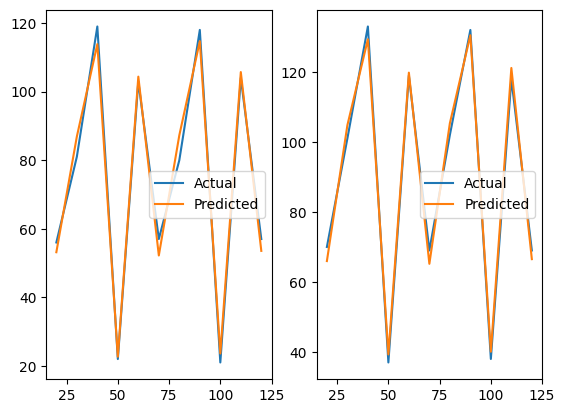

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Input data
t = np.array([73, 91, 87, 102, 69, 74, 91, 88, 101, 68, 73])
h = np.array([43, 64, 58, 37, 70, 43, 65, 59, 37, 71, 44])
r = np.array([67, 88, 134, 43, 96, 66, 87, 134, 44, 96, 66])
m = np.array([56, 81, 119, 22, 103, 57, 80, 118, 21, 104, 57])
o = np.array([70,101,133,37,119,69,102,132,38,118,69])
x = np.array([20,30,40,50,60,70,80,90,100,110,120])

# Normalize the data
t_mean, t_std = np.mean(t), np.std(t)
h_mean, h_std = np.mean(h), np.std(h)
r_mean, r_std = np.mean(r), np.std(r)
m_mean, m_std = np.mean(m), np.std(m)
o_mean, o_std = np.mean(o), np.std(o)

t = (t - t_mean) / t_std
r = (r - r_mean) / r_std
h = (h - h_mean) / h_std
m = (m - m_mean) / m_std
o = (o - o_mean) / o_std

# Initialize coefficients and learning rate
c1 = 0.3
c2 = 0.5
c3 = 0.5
d1 = 0.3
d2 = 0.5
d3 = 0.5
lr = 0.0001

# Calculate initial predicted values
m_p = c1 * t + c2 * r + c3 * h
o_p = d1 * t + d2 * r + d3 * h

# Calculate initial cost
cost_m = np.sum((m_p - m) ** 2) / 11
cost_o = np.sum((o_p - o) ** 2) / 11

# Gradient descent optimization
for i in range(25000):
    # Update coefficients
    c1n = c1 - lr * np.dot(t, m_p - m) / 11
    c2n = c2 - lr * np.dot(r, m_p - m) / 11
    c3n = c3 - lr * np.dot(h, m_p - m) / 11
    d1n = d1 - lr * np.dot(t, o_p - o) / 11
    d2n = d2 - lr * np.dot(r, o_p - o) / 11
    d3n = d3 - lr * np.dot(h, o_p - o) / 11
    c1, c2, c3, d1, d2, d3 = c1n, c2n, c3n, d1n, d2n, d3n

    # Update predicted values
    m_p = c1 * t + c2 * r + c3 * h
    o_p = d1 * t + d2 * r + d3 * h

    # Update cost
    cost_m = np.sum((m_p - m) ** 2) / 11
    cost_o = np.sum((o_p - o) ** 2) / 11

# Denormalize the data
m = m * m_std + m_mean
m_p = m_p * m_std + m_mean
o = o * o_std + o_mean
o_p = o_p * o_std + o_mean

# Plot the results
figure, axis = plt.subplots(1, 2)
axis[0].plot(x,m,label = "Actual")
axis[0].plot(x,m_p,label = "Predicted")
axis[0].legend()
# axis[0].show()
axis[1].plot(x,o,label = "Actual")
axis[1].plot(x,o_p,label = "Predicted")
axis[1].legend()

# Print coefficients
print("c1:", c1)
print("c2:", c2)
print("c3:", c3)
print("d1:", d1)
print("d2:", d2)
print("d3:", d3)

# Make predictions on new data sets
new_data_set1 = np.array([92, 87, 64])
new_data_set2 = np.array([87, 135, 57])
new_data_set3 = np.array([103, 43, 36])
c = np.array([c1, c2, c3])
d = np.array([d1, d2, d3])

prediction1_m = np.dot(c, new_data_set1)
prediction2_m = np.dot(c, new_data_set2)
prediction3_m = np.dot(c, new_data_set3)
prediction1_o = np.dot(d, new_data_set1)
prediction2_o = np.dot(d, new_data_set2)
prediction3_o = np.dot(d, new_data_set3)

print("Mango Prediction 1:",prediction1_m)
print("Mango Prediction 2:",prediction2_m)
print("Mango Prediction 3:",prediction3_m)
print("Orange Prediction 1:",prediction1_o)
print("Orange Prediction 2:",prediction2_o)
print("Orange Prediction 3:",prediction3_o)